In [116]:
## importing modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# reading data file
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
dataset[["Classes"]] = dataset[["Classes"]].applymap(lambda x : x.strip())
dataset.head()

,day,Region,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,Bejaia,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,Bejaia,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,Bejaia,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,Bejaia,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,Bejaia,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [118]:
# managing categorical data
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dataset["Region"] = LE.fit_transform(dataset["Region"])
dataset["Classes"] = LE.fit_transform(dataset["Classes"])
dataset.head()

,day,Region,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [119]:
dataset = dataset.drop(["year"],axis=1)

Exploratory analysis

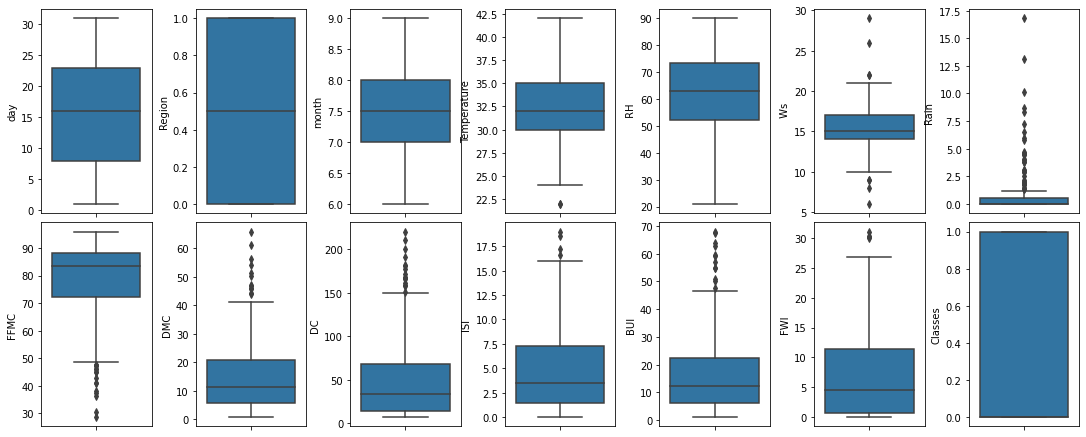

In [120]:
# boxplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)

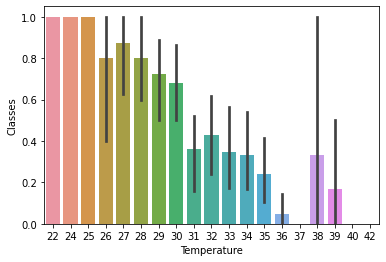

In [121]:
sns.barplot(data=dataset, x=dataset["Temperature"],y=dataset["Classes"])
plt.show()

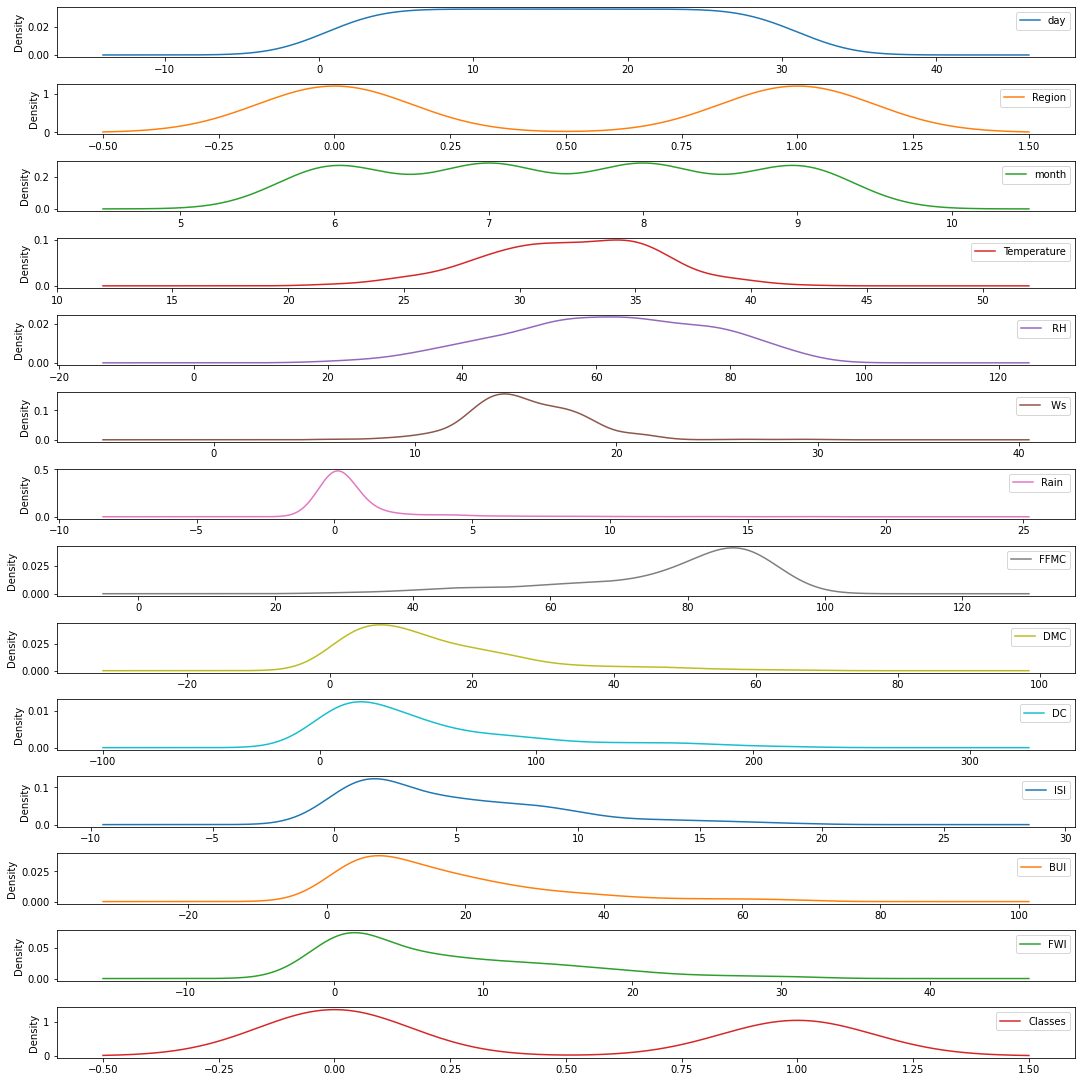

In [122]:
dataset.plot(kind="density",subplots=True,sharex=False,figsize=(15,15))
plt.tight_layout(pad=0.6)
plt.show()

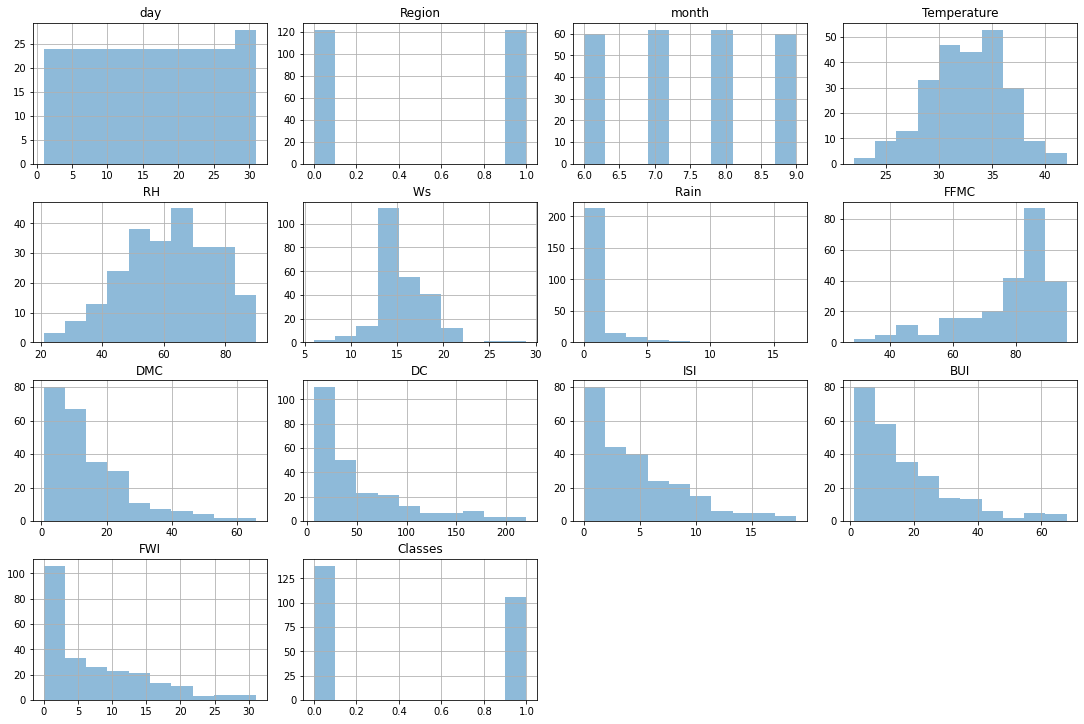

In [123]:
dataset.hist(alpha = 0.5, figsize=(15,10))
plt.tight_layout(pad= 0.5)
plt.show()

<AxesSubplot:>

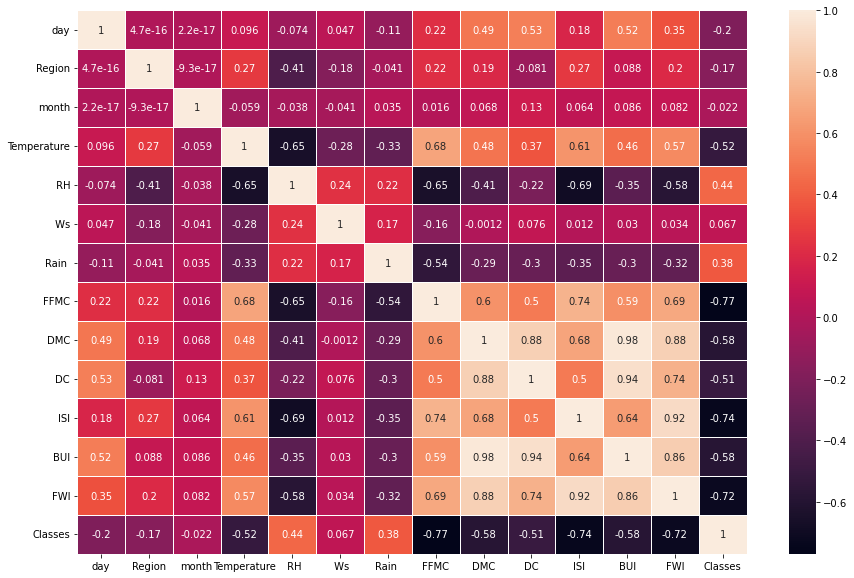

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5)

In [125]:
dataset.isnull().sum()

day            0
Region         0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [126]:
dataset = dataset.drop(["DC","DMC","FWI"],axis = 1)

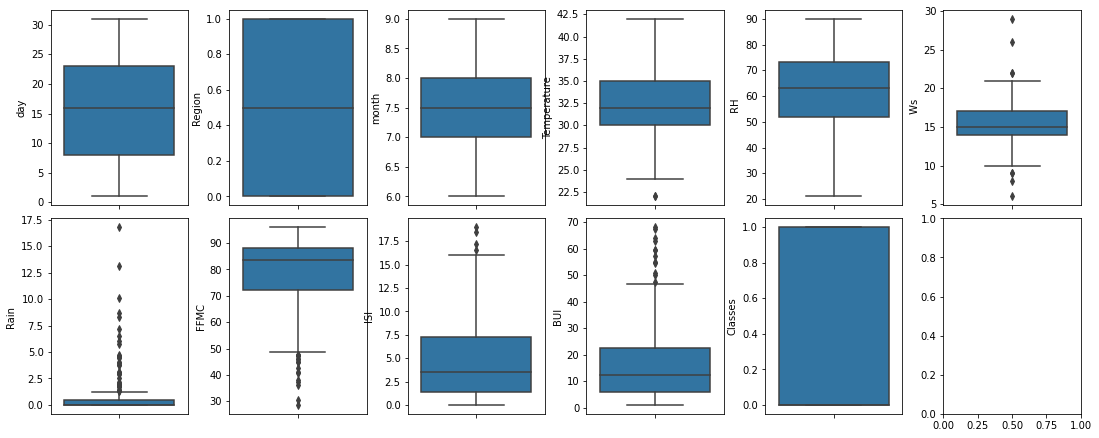

In [127]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()
for k in dataset.columns:
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)

In [128]:
# outlier treatment

outlier_cols = [" Ws","Rain ","FFMC","ISI","BUI"]
for i in outlier_cols:
    dataset[i] = (dataset[i])**(1/3)


In [129]:
from sklearn.model_selection import train_test_split

X = dataset.drop(["Classes"],axis=1)
Y = dataset["Classes"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=1)

In [130]:
## importing model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

In [131]:
# checking accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
acc_train = accuracy_score(Y_train, y_pred)
y_pred = model.predict(X_test)
acc_test = accuracy_score(Y_test, y_pred)
print(f'Train acc - {acc_train}    Test acc = {acc_test}')

Train acc - 1.0    Test acc = 0.972972972972973


In [132]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [133]:
# grid search cvmodel
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'max_leaf_nodes': [3,4, 5,6]
}
model2 = GridSearchCV(DecisionTreeClassifier(), param_grid)

model2.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [3, 4, 5, 6]})

In [134]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3)

In [135]:
y_pred = model2.predict(X_train)
acc_train = accuracy_score(Y_train, y_pred)
y_pred = model2.predict(X_test)
acc_test = accuracy_score(Y_test, y_pred)
print(f'Train acc - {acc_train}    Test acc = {acc_test}')

Train acc - 0.9941176470588236    Test acc = 0.972972972972973
